In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

import thesis
chapter = 'theory'
save = True

from thesis.constants import Delta, f_1p, f_mc, T_bath
from scipy.constants import h, k as k_B, pi
from scipy.special import i0, k0

Mistakes fixed on 2018-01-02

In [2]:
def upsilon_1(Delta0, T, f):
    xi = h * f / (2 * k_B * T)
    return ((8 * Delta0) / (pi**3 * k_B * T))**(1 / 2) * np.sinh(xi) * k0(xi)

def upsilon_2(Delta0, T, f):
    xi = h * f / (2 * k_B * T)
    return - (1 + ((2 * Delta0) / (pi * k_B * T))**(1 / 2) * np.exp(-xi) * i0(xi))

In [3]:
linestyle_1p = '-'
linestyle_mc = '--'

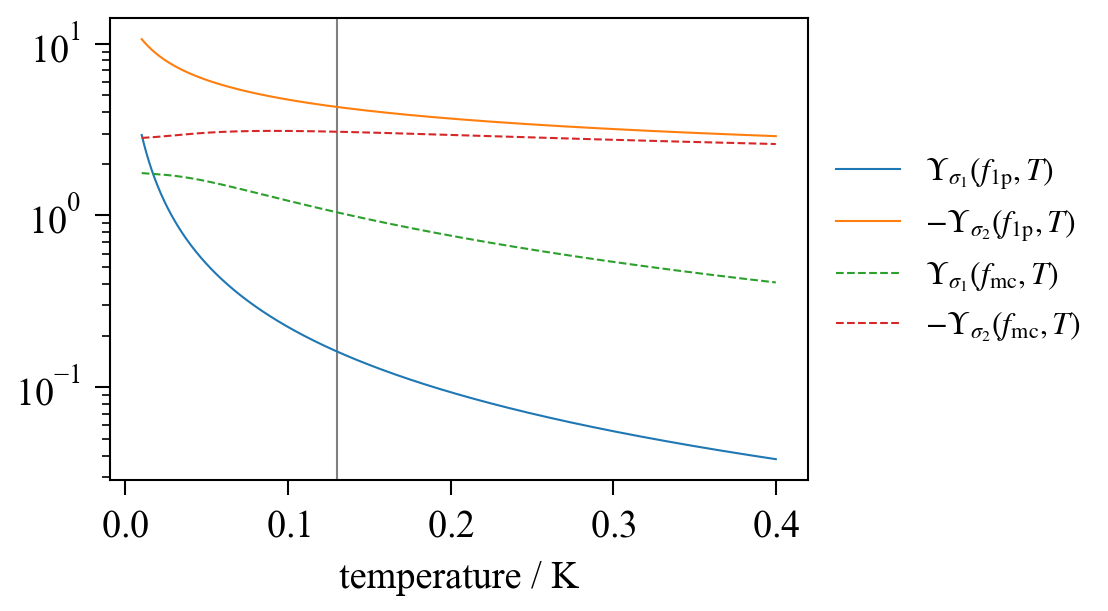

In [4]:
fig, ax = plt.subplots()
ax.set_xlabel('temperature / K')
ax.set_yscale('log')
ax.axvline(T_bath, color='gray')
TT = np.linspace(0.01, 0.4, 10000)
ax.plot(TT, upsilon_1(Delta, TT, f_1p),
        linestyle=linestyle_1p, label='$\Upsilon_{\sigma_1}(f_\mathrm{1p}, T)$')
ax.plot(TT, -upsilon_2(Delta, TT, f_1p),
        linestyle=linestyle_1p, label='$-\Upsilon_{\sigma_2}(f_\mathrm{1p}, T)$')
ax.plot(TT, upsilon_1(Delta, TT, f_mc),
        linestyle=linestyle_mc, label='$\Upsilon_{\sigma_1}(f_\mathrm{mc}, T)$')
ax.plot(TT, -upsilon_2(Delta, TT, f_mc),
        linestyle=linestyle_mc, label='$-\Upsilon_{\sigma_2}(f_\mathrm{mc}, T)$')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='x-small')

if save:
    fig.savefig(thesis.full_filename(chapter, 'normresponse_conductivity_thermal.pdf'))

In [5]:
print("At T = {:.2f} K, Y_2(f_1p) / Y_1(f_1p) = {:.1f}".format(
    T_bath, upsilon_2(Delta0=Delta, T=T_bath, f=f_1p) / upsilon_1(Delta0=Delta, T=T_bath, f=f_1p)))

At T = 0.13 K, Y_2(f_1p) / Y_1(f_1p) = -26.5


In [6]:
print("At T = {:.2f} K, Y_2(f_mc) / Y_1(f_mc) = {:.1f}".format(
    T_bath, upsilon_2(Delta0=Delta, T=T_bath, f=f_mc) / upsilon_1(Delta0=Delta, T=T_bath, f=f_mc)))

At T = 0.13 K, Y_2(f_mc) / Y_1(f_mc) = -2.9
